# 02807: Project 2
 
## Practical information
 
* This project must be completed in groups of 3 students.
    * The group must be registered on the course site on DTU Learn: My Course > Groups
    * Groups must be registered anew (even if you already registered for Project 1)
* This project must be handed in as a jupyter notebook to the course site on DTU Learn. 
    * Go to the Course Content > Assignments tab to upload your submission. 
* This project is due on Monday, November 29, 20:00.

## Submission rules

* Each group has to hand in *one* notebook (`.ipynb`) with their solutions, including a filled out Contribution table (see below).
* Your solution must be written in Python.
* For each question you should use the cells provided ("`# your code goes here`" and "*your explanation here*") for your solution
    * It is allowed to add code cells within a question block, but consider if it's really necessary.
* You should not remove the problem statements, and you should not modify the structure of the notebook.
* Your notebook should be runnable and readable from top to bottom.
    * Meaning that your code cells work when run in order (from top to bottom).
    * Output of any cell depends only on itself and cells above it.
* Your notebook should be submitted after having been run from top to bottom.
    * This means outputs are interpretable without necessarily running your cells.
    * The simplest way to achieve this is using the jupyter menu item Kernel > Restart & Run All just prior to submission. If any cell fails when you do this, your notebook is not ready for submission.
    * Exercise 3 in particular will take time to finish, plan accordingly, that is, make sure you have time to run your notebook from top to bottom.
* Failure to comply may make it impossible for us to evaluate your submission properly, which will likely negatively impact the points awarded.

## Solution guidelines
* Data processing is via Spark for the first three exercises and pandas/SQL in the fourth exercise.
* Where naming of dataframes and functions are explicitly stated, these must be used.
* Your solutions will be evaluated by correctness, code quality and interpretability of the output. 
    * You have to write clean, readable and efficient Spark code that will generate sensible execution plans.
    * You have to write clean, readable and efficient SQL queries.
    * Your tables and visualisations should be meaningful and easy to read. This requires, but is not limited to, including headers, legends and well-written (brief) descriptions for graphs/charts. In this step you've found the data processing solution, so put also some effort into its presentation.

## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 150.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
    * Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
    * Several group members can take credit for the same solution if they all have contributed substantially to it.
* Each group member must contribute **at least 65 points**. 
    * If no name is provided for an exercise's part, **all group members** are considered contributors to it.
* Group members should decide amongst themselves how to collaborate on the project to meet these constraints.  
* Scores are individual. The score $\text{score}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{score}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$
  
  
* The following is an example of a contributions table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | John      |
| **Part 4** | Ann       |  Ann          |     John, Mary       | John       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |


* **Example**: in the contribution table above, suppose that all parts are solved correctly except for those of Exercise 4 which are all wrong. Then Ann's score is calculated as follows:

  * $\text{individual-score}(Ann) = \frac{5+5+10+5+5+15+15}{5+5+10+5+5+15+15+15+5} = \frac{60}{80} = 0.75$

  * $\text{group-score} = \frac{95}{150} = 0.633$

  * $\text{score}(Ann) = 7.5\cdot 0.75 + 2.5 \cdot 0.633 = 7.21$


# Group contribution table 

This table must be filled before submission.



In [1]:
import pandas as pd

d = {'Exercise 1' : ['All', 'All', 'All', 'All', 'n.a'], 
     'Exercise 2' : ['All', 'All', 'All', 'All', 'All'],
     'Exercise 3' : ['All', 'All', 'All', 'All', 'n.a'],
     'Exercise 4' : ['All', 'All', 'All', 'All', 'n.a'],
     } 
  
ct = pd.DataFrame(d, index=['Part 1', 'Part 2', 'Part 3', 'Part 4', 'Part 5']) 

ct

,Exercise 1,Exercise 2,Exercise 3,Exercise 4
Part 1,,,,
Part 2,,,,
Part 3,,,,
Part 4,,,,
Part 5,n.a,,n.a,n.a


# The AirBnB dataset

<img src="https://www.esquireme.com/public/images/2019/11/03/airbnb-678x381.jpg" alt="airbnb" width="400"/>

[Airbnb](http://airbnb.com) is an online marketplace for arranging or offering lodgings. In the first three exercises you will use Spark to analyze data obtained from the Airbnb website (stricly speaking via data scraped by [insideairbnb](http://insideairbnb.com/get-the-data.html)). The purpose of your analysis is to extract insights about listings as a whole, specifics about London, and sentiment analysis of reviews (word positivity).


## Loading data
The dataset consists of listings (offered lodgings) and reviews (submitted by users). The `.csv`'s you'll work with vary between the first three exercises, but is structured so that the function below will load it into a spark dataframe.

In [2]:
def load_csv_as_dataframe(path):
    return spark.read.option('header', True) \
                .option('inferSchema', True) \
                .option('multiLine', 'True') \
                .option('escape', '"') \
                .option('mode', 'DROPMALFORMED')\
                .csv(path)

## Imports and Spark session

* You'll need to adapt the `JAVA_HOME` environment variable to your setup. 
* You should set the `spark.driver.memory` value to the amount of memory on your machine. 
* It may be required for you to install some of the packages imported below (e.g. pandasql).

In [6]:
# Instructions on p. 20 Learning Spark, 2nd ed.
# Here's a quick-guide, googling may also be required
# 1) Install pyspark via conda/pip
#          pyspark requires the JAVA_HOME environment variable is set.
# 2) Install JDK 8 or 11, figure out the install location
#          Suggest to use https://adoptopenjdk.net/
# 3) Update the JAVA_HOME environment variable set programmatically below 
#    with your install location specifics

# JAVA_HOME environment variable is set programatically below
# but you must point it to your local install

import os
os.environ['JAVA_HOME'] = '/Library/Internet Plug-Ins/JavaAppletPlugin.plugin/Contents/Home'
# If you get "Job aborted due to stage failure" and 
# "Python worker failed to connect back." exceptions, 
# this should be solved by additionally setting these 
# environment variables

# os.environ['PYSPARK_PYTHON'] = 'python'
# os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
# os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'notebook'

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark import SparkContext, SparkConf

from pandas_profiling import ProfileReport

import pandasql as psql

In [8]:
# Sets memory limit on driver and to use all CPU cores
conf = SparkConf().set('spark.ui.port', '4050') \
        .set('spark.driver.memory', '4g') \
        .setMaster('local[*]')

sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [9]:
spark

In [11]:
sc.getConf().getAll()

[('spark.driver.memory', '4g'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.host', 'runes-mbp.clients.net.dtu.dk'),
 ('spark.app.name', 'pyspark-shell'),
 ('spark.ui.port', '4050'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.sql.warehouse.dir',
  'file:/Users/runenisbeth/Documents/DTU/Kandidat/1semester/Tools%20for%20Data%20Science/Project%202/spark-warehouse'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1638195421825'),
 ('spark.driver.port', '57726'),
 ('spark.app.startTime', '1638195420952'),
 ('spark.ui.showConsoleProgress', 'true')]

# Exercise 1: Listings and cities (20 pts)

In this exercise you must use Spark to do the data processing. 
* For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. 
* For parts requiring visualisation, the `toPandas` call should be followed only by functions necessary to customize the plotting/layout steps (i.e. no data processing take place after your spark dataframe is materialized).


## Part 1: Preparing the dataframe (5 pts)

Your data source is [this zip archive](https://data-download.compute.dtu.dk/c02807/listings.csv.zip) which you must uncompress and place in the same folder as this notebook. It is loaded in the next cell and named `df_listings`.

After the data is read, you should select the columns necessary for exercise 1, 2 and 3 (by reading ahead or iteratively extend this loading code). Name this dataframe `df_listings_analysis` and make use of caching.

Prices are in local currency, but are nonetheless prefixed with `$` and contains thousands separator commas. You will need to remove these characters and cast the price column to `pyspark.sql.types.DoubleType`. Observe that if this casting is not possible, the result of the cast is `null`.

In [13]:
df_listings = load_csv_as_dataframe('listings.csv')

In [14]:
import re
from pyspark.sql.functions import udf

# COLUMNS TO KEEP
columns_to_select = ['city', 'price', 'neighbourhood_cleansed', 'review_scores_rating', 'property_type', 'id']
df_listings_analysis = df_listings.select(columns_to_select).na.drop()


# Cast Review to int
df_listings_analysis = df_listings_analysis.withColumn('review_scores_rating', F.col('review_scores_rating').cast('int'))

# FUNCTION THAT REMOVES COMMAS AND § 
commaRep = udf(lambda x: re.sub('\$|\,','', x))
#CommaRep() and cast(Int)
df_listings_analysis = df_listings_analysis.withColumn('price', commaRep('price').cast("int")) 


## Part 2: Listing and neighbourhood counts (5 pts)

Compute and visualise the number of listings and the number of different neighbourhoods per city, restricted to the 15 cities having the most listings. The x-axis should be ordered by number of listings (high to low).

Make sure to use the `neighbourhood_cleansed` column in your computations.


In [15]:
listings_per_city = df_listings_analysis.groupby('city')\
    .agg(F.count(F.col('city')), F.countDistinct('neighbourhood_cleansed'))\
    .orderBy('count(city)', ascending=False)\
    .limit(15).toPandas()

#no_listings_per_city = df_listings_analysis.groupby('city').count().orderBy('count', ascending=False).limit(15).toPandas()
#no_neighbourhoods_per_city = df_listings_analysis.select('city','neighbourhood_cleansed').distinct().groupby('city').count().limit(15).toPandas()

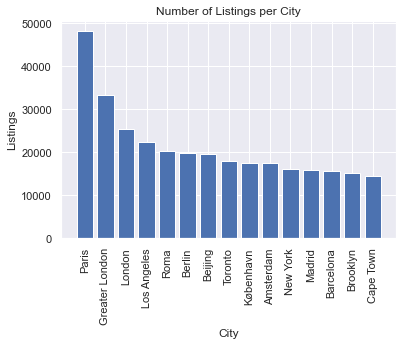

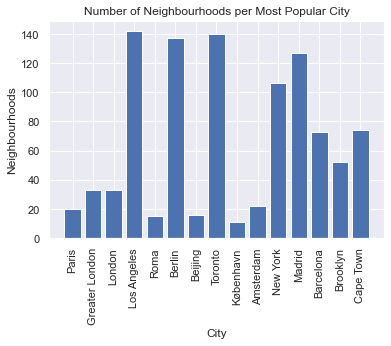

In [16]:
# Make Bar graph of listings per city
plt.figure()
plt.title('Number of Listings per City')
plt.bar(listings_per_city['city'],listings_per_city['count(city)'])
plt.xlabel('City')
plt.ylabel('Listings')
plt.xticks(rotation=90)
plt.show()

# Make Bar graph of neighbourhoods per city
plt.figure()
plt.title('Number of Neighbourhoods per Most Popular City')
plt.bar(listings_per_city['city'],listings_per_city['count(neighbourhood_cleansed)'])
plt.xlabel('City')
plt.ylabel('Neighbourhoods')
plt.xticks(rotation=90)
plt.show()

## Part 3: Price averages (5 pts)

Compute and visualise the average price of listings per city, restricted to the 15 cities having the most listings.

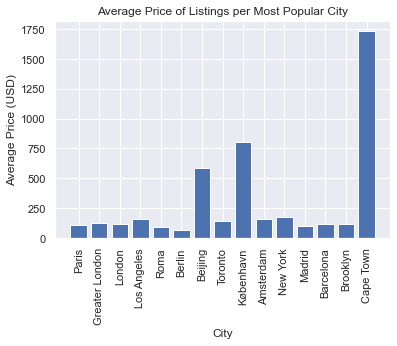

In [17]:
avg_price_per_city = df_listings_analysis.groupby('city')\
    .agg(F.count(F.col('city')), F.avg('price'))\
    .orderBy('count(city)', ascending=False)\
    .limit(15).toPandas()

# Make Bar graph of average price
plt.figure()
plt.title('Average Price of Listings per Most Popular City')
plt.bar(avg_price_per_city['city'],avg_price_per_city['avg(price)'])
plt.xlabel('City')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=90)
plt.show()

## Part 4: Value for money (5 pts)

The value of a listing is its rating divided by its price. The value of a city is the average value of its listings. 

Prices are only comparable when the local currency is the same. We'll therefore consider a subset of Euro-zone cities as defined in `eurozone_cities`.

Compute and visualise the value per city, restricted to the Euro-zone cities.

In [18]:
eurozone_cities = [
    'Paris', 'Roma', 'Berlin', 'Madrid', 'Amsterdam', 'Barcelona', 'Milano', 'Lisboa',
    'München', 'Wien', 'Lyon', 'Firenze', 'Porto', 'Napoli', 'Bordeaux', 'Venezia',
    'Málaga', 'Sevilla', 'València'
]

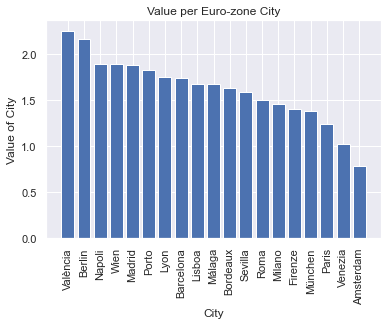

In [34]:
def value_of_listing(price, rating):
    return rating/price 

value_per_city = df_listings_analysis.filter(F.col('city').isin(eurozone_cities)) \
    .withColumn('listing_value', value_of_listing(F.col('price'), F.col('review_scores_rating'))) \
    .groupBy('city').avg('listing_value').orderBy(F.desc('avg(listing_value)')).toPandas()

#visualize data
plt.figure()
plt.title('Value per Euro-zone City')
plt.bar(value_per_city['city'].astype(str),value_per_city['avg(listing_value)'])
plt.xlabel('City')
plt.ylabel('Value of City')
plt.xticks(rotation=90)
plt.show()

# Exercise 2: The case of London (30 pts)

In this exercise you must use Spark to do the data processing. 
* For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. 
* For parts requiring visualisation, the `toPandas` call should be followed only by functions necessary to customize the plotting/layout steps (i.e. no data processing take place after your spark dataframe is materialized). 
* You may need multiple queries to solve the individual parts.

Your dataframe is a subset of `df_listings_analysis` and should be named `df_listings_london`.

In [20]:
df_listings_london = df_listings_analysis.filter(F.col('city')=='London')

## Part 1: Price distribution (5 pts)

Compute and visualise the distribution of prices, for all prices up to and including the 95-percentile. Additionally, compute and visualise the distribution of prices, for all prices above the 95-percentile.

In [21]:
# cache london prices becuase we will need these for multiple calls and the process is much faster
london_prices = df_listings_london.select('price').cache()

# do calculations
p_95th = london_prices.select(F.percentile_approx("price", [0.95], 1000000)).head()[0][0]
prices_to_95th = london_prices.filter(F.col('price')<= p_95th).toPandas()
prices_over_95th = london_prices.filter(F.col('price') > p_95th).toPandas()

# remove the cache from memomry
london_prices.unpersist()

DataFrame[price: int]

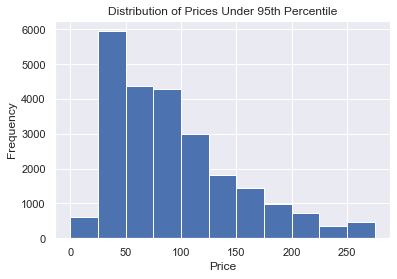

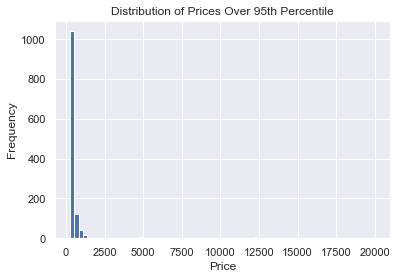

In [22]:
#visualize distribbution under 95th Percentile
plt.figure()
plt.title('Distribution of Prices Under 95th Percentile')
hist_bins = [0,25,50,75,100,125,150,175,200,225,250,275]
plt.hist(prices_to_95th, bins = hist_bins)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#visualize distribbution over 95th Percentile
plt.figure()
plt.title('Distribution of Prices Over 95th Percentile')
hist_bins = [300,500,1000,1500,2000,2500,3000]
plt.hist(prices_over_95th, bins = 75)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Part 2: Prices by type of property (5 pts)

Compute and visualise the average price and average rating per type of property, for property types with 75 or more listings. 

Your visualisation should be a single bar chart with two y-axes and two bars per property type. The x-axis should be ordered by average rating.

<ipython-input-23-e30ff6360685>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


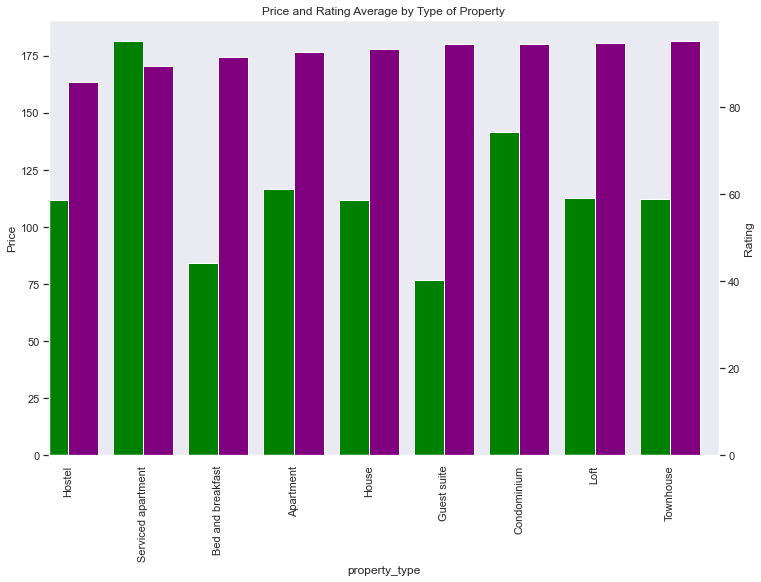

In [23]:
price_rating_avg = df_listings_london.groupby('property_type').agg(F.count('id').alias('num'), F.avg('price'), F.avg('review_scores_rating'))\
                      .filter(F.col('num') > 75).sort(F.col('avg(review_scores_rating)')).toPandas()

#set index to property type for easier plotting
price_rating_avg = price_rating_avg.set_index('property_type')

#visualize the average price and average rating per type of property
fig = plt.figure(figsize=(12,8))
plt.title('Price and Rating Average by Type of Property')

ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4

price_rating_avg['avg(price)'].plot(kind='bar', color='green', ax=ax, width=width, position=1, grid = False)
price_rating_avg['avg(review_scores_rating)'].plot(kind='bar', color='purple', ax=ax2, width=width, position=0, grid = False)

ax.set_ylabel('Price')
ax2.set_ylabel('Rating')

plt.show()

## Part 3: Best offering in the neighbourhood (10 pts)

The value of a listing is its rating divided by its price. Compute and display a dataframe (with the columns you selected in Exercise 1 and those computed in this part) with the 3 highest valued listings in each neighbourhood, and having a value above 5. Make sure to use the `neighbourhood_cleansed` column in your computations.

Computing ranks based on value can be achieved using `pyspark.sql.window.Window`. This may produce equal ranks (i.e. when the value of two listings are the same).

Remember to use `pd.set_option('display.max_rows', <n>)` with appropriate `<n>` so all rows are displayed.

In [35]:
from pyspark.sql.window import Window
windowSpec  = Window.partitionBy("neighbourhood_cleansed").orderBy("value")

best_offering = df_listings_london.withColumn('value', F.col('review_scores_rating')/F.col('price'))\
                                    .filter(F.col('value')>=5)\
                                    .withColumn("rank",F.rank().over(windowSpec))\
                                    .filter(F.col('rank')<=3)\
                                    .toPandas()

pd.set_option('display.max_rows', len(best_offering))
pd.set_option('display.max_columns', len(best_offering.columns))

best_offering


,city,price,neighbourhood_cleansed,review_scores_rating,property_type,id,value,rank
0,London,20,Croydon,100,Apartment,14217336,5.000000,1
1,London,19,Croydon,97,Apartment,8420459,5.105263,2
2,London,18,Croydon,92,House,7208317,5.111111,3
3,London,20,Wandsworth,100,Parking Space,1306561,5.000000,1
4,London,20,Wandsworth,100,Apartment,6971334,5.000000,1
5,London,20,Wandsworth,100,House,11095582,5.000000,1
6,London,20,Wandsworth,100,Apartment,29727842,5.000000,1
7,London,20,Lambeth,100,Apartment,14599966,5.000000,1
8,London,19,Lambeth,100,House,11398962,5.263158,2
9,London,18,Lambeth,95,Apartment,3573976,5.277778,3


## Part 4: Activity by month (5 pts)

Activity is given by the number of reviews received in a given time period. Compute and visualise the activity based on month, that is, the total number of reviews given in January, February, etc..

Your additional data source is [this zip archive](https://data-download.compute.dtu.dk/c02807/reviews_london.csv.zip) which you must uncompress and place in the same folder as this notebook. It is loaded in the next cell and named `df_reviews_london`.

In [25]:
df_reviews_london = load_csv_as_dataframe('reviews_london.csv')

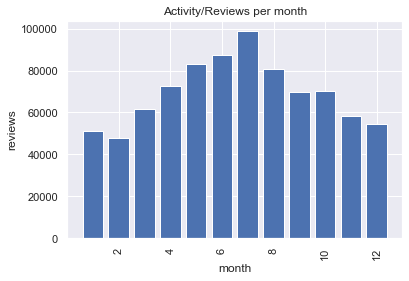

In [26]:
df_reviews_london = df_reviews_london.withColumn('date', F.to_date('date'))
df_reviews_london = df_reviews_london.withColumn('month', F.month('date'))

activity = df_reviews_london.groupby('month').count().sort('month').toPandas()

plt.figure()
plt.title('Activity/Reviews per month')
plt.bar(activity['month'], activity['count'])
plt.xlabel('month')
plt.ylabel('reviews')
plt.xticks(rotation=90)
plt.show()

## Part 5: Reviews per listing (5 pts)

Each London listing has received 0 or more reviews. 

Display a dataframe showing 1) The number of listings, 2) The average number of reviews a listing receives, 3) The standard deviation of the reviews per listing distribution, 4) The minimum number of reviews any listing has received, and 5) The maximum number of reviews any listing has received.

In [104]:
listings_without_reviews = df_reviews_london.join(df_listings_london, cond, 'outer')\
                        .select(df_listings_london.id, df_reviews_london.listing_id)\
                        .groupby('id').agg(F.countDistinct('listing_id'))\
                        .toPandas()

listings_without_reviews[listings_without_reviews['count(listing_id)']>1]



,id,count(listing_id)
5250,None,565


In [107]:
# JOIN DATAFRAMES
cond = [df_listings_london.id == df_reviews_london.listing_id]
reviews_joined_london = df_listings_london.join(df_reviews_london, cond, 'outer').select(df_listings_london.id, df_reviews_london.listing_id)

print('!WARNING: THE LISTINGS WITHOUT A REVIEW IS CALCULATED AS HAVING 1 REVIEW. \n THAT WILL EFFECT MEAN, STDDEV, MIN \565 LISTINGS DO NOT HAVE ANY REVIEW WHICH ACCOUNT FOR 2% OF THE LISTINGS IN LONDON WHICH WOULD DECREASE THE REPORTED MEAN BY A SMALL MARGIN, INCEREASE THE REPORTED STDDEV BY A SMALL MARGIN AND MIN = 0')
reviews_joined_london.groupby('id').count().describe('count').toPandas()

!WARNING: THE LISTINGS WITHOUT A REVIEW IS CALCULATED AS HAVING 1 REVIEW. 
 THAT WILL EFFECT MEAN, STDDEV, MIN ŵ LISTINGS DO NOT HAVE ANY REVIEW WHICH ACCOUNT FOR 2% OF THE LISTINGS IN LONDON WHICH WOULD DECREASE THE REPORTED MEAN BY A SMALL MARGIN, INCEREASE THE REPORTED STDDEV BY A SMALL MARGIN AND MIN = 0


,summary,count
0,count,25357
1,mean,32.984698505343694
2,stddev,51.41367360010423
3,min,1
4,max,735


# Exercise 3: Word sentiment (45 pts)

In this exercise you must use Spark to do the data processing. For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. You may need multiple queries to solve the individual parts.

The goal here is to determine what sentiment (positive or negative) words in reviews have. Roughly speaking, we want each word to be assigned a score based on the rating of the reviews in which the word occurs in the review comment. We'd expect words such as "clean", "comfortable", "superhost" to receive high scores, while words such as "unpleasant", "dirty", "disgusting" would receive low scores.

As individual reviews do not have a rating, we'll consider the rating of individual reviews to be the rating of its related listing (i.e. assuming each review gave the average rating (`review_scores_rating`) of the listing). 

The score of a word is given by the mean review rating over the reviews in which that word occurs in the comment. We require words to appear in at least 0.5% (1 in 200) listings, and to be at least 4 characters, for it to have a defined score.

Formally, when a word $w$ occurs in at least $0.5\%$ of listings and $|w| > 3$, its score is

$
\begin{align*}
score(w) = \frac{1}{|C_w|}\sum_{comment \in C_w} \text{review_rating}(comment)
\end{align*}
$
, where 
* $C_w = \{comment \mid w \text{ occurs in } \text{clean_text}(comment)\}$, the set (so no duplicates) of comments in which $w$ occurs, and
* $\text{clean_text}(comment)$ is the result of your `clean_text` function defined below, and
* $\text{review_rating}(comment)$ is the `review_scores_rating` of the listing which this $comment$ is related to.


## Part 1: Toy data (15 pts)

To get started we'll consider a toy example where the input is `df_sentiment_listings_toy` and `df_sentiment_reviews_toy` defined in the next code cell. You should provide an implementation of `calculate_word_scores_toy` in the subsequent code cell. Your implementation should result in a query that when given the toy example dataframes as input and is materialized with `toPandas()` produces this table:

|    | word   |   word_score |   listing_occurences |   word_occurences |   comment_occurences |
|---:|:-------|-------------:|---------------------:|------------------:|---------------------:|
|  0 | aaaa   |      7       |                    3 |                 5 |                    5 |
|  1 | bbbb   |      6.66667 |                    2 |                 3 |                    3 |
|  2 | eeee   |      0       |                    1 |                 1 |                    1 |
|  3 | dddd   |      5       |                    1 |                 1 |                    1 |
|  4 | cccc   |      5       |                    2 |                 2 |                    2 |'

Observe that `word_occurences` and `comment_occurences` are the same as words occuring multiple times in a comment are counted once, and that `clean_text` is used to ignore casing and discard non-words. Additionally, any word occuring at least once will occur in more than 1 out of 200 listings on this toy data.

In [28]:
from pyspark.sql.types import StructType, StructField, StringType

schema_listings = StructType([
    StructField('id', StringType(), True),
    StructField('review_scores_rating', StringType(), True),
])
data_listings = [
    {'id': '0', 'review_scores_rating': '10'},
    {'id': '1', 'review_scores_rating': '5'},
    {'id': '2', 'review_scores_rating': '0'},
]
df_sentiment_listings_toy = spark.createDataFrame(data_listings, schema_listings)

schema_reviews = StructType([
    StructField('listing_id', StringType(), True),
    StructField('id', StringType(), True),
    StructField('comments', StringType(), True),
])
data_reviews = [
    {'listing_id': '0', 'id': '100', 'comments': 'aaaa bbbb          cccc'},
    {'listing_id': '0', 'id': '101', 'comments': 'aaaa bbbb '},
    {'listing_id': '0', 'id': '102', 'comments': 'aaaa aAAa          aaaa'},
    {'listing_id': '1', 'id': '103', 'comments': 'Aaaa bbb ccc'},
    {'listing_id': '1', 'id': '104', 'comments': 'dddd %ˆ&*'},
    {'listing_id': '2', 'id': '105', 'comments': 'AaaA'},
    {'listing_id': '2', 'id': '106', 'comments': 'bbbb ccc e&eˆˆee'},
    {'listing_id': '2', 'id': '107', 'comments': 'cccc cccc'},
]

df_sentiment_reviews_toy = \
    spark.createDataFrame(data_reviews, schema_reviews) \
        .select(F.col('listing_id'), F.col('id').alias('comment_id'), F.col('comments'))


In [29]:
def clean_text(col):
    result = F.lower(col) # 1) Lower case the text
    result = F.regexp_replace(result, "(?!\s)(\W)", "") # 2) Remove anything but letters, digits and whitespaces
    result = F.regexp_replace(result, "(\s*)?\s", " ") #3) Turn multiple whitespaces into single whitespaces
    return result
    """
        Cleans the text (comment) associated with col. The
        cleaning should:
            1) Lower case the text
            2) Turn multiple whitespaces into single whitespaces
            3) Remove anything but letters, digits and whitespaces
        
        :col: A Spark Column object containing text data
        :returns: A Spark Column object.
    """
    raise NotImplementedError

def calculate_word_scores_toy(df_list, df_rev):
    # CLEAN COMMENTS AND EXPLODE TO WORDS
    df_rev = df_rev.withColumn('comments', clean_text(F.col('comments')))
    df_rev = df_rev.withColumn('word', F.explode(F.split(F.col('comments'), ' ')))
    
    # FILTER OUT WORDS WITH LESS THAN 4 LETTERS
    df_rev = df_rev.filter(F.length('word')>3)

    # JOIN DATAFRAME OF RATINGS AND DATAFRAME OF REVIEWS  
    cond = [df_list.id == df_rev.listing_id]
    df = df_list.join(df_rev, cond, 'outer')
    # DROP DUPLICATES OF WORDS IN SAME REVIEW. 
    df = df.dropDuplicates(['word', 'comment_id'])
    
    df = df.groupby('word').agg(\
                    F.avg(F.col('review_scores_rating')).alias('word_score'), \
                    F.countDistinct(F.col('listing_id')).alias('listing_occurences'), \
                    F.count(F.col('comment_id')).alias('word_occurences'),\
                    F.count(F.col('comment_id')).alias('comment_occurences'))
    

    return df.toPandas()
    """
        Calculates the word score over listings in df_list and
        reviews in df_rev. The table produced should have the 
        same columns as specified in part 1.
        
        :returns: A pandas DataFrame
    """
    raise NotImplementedError

calculate_word_scores_toy(df_sentiment_listings_toy, df_sentiment_reviews_toy)

,word,word_score,listing_occurences,word_occurences,comment_occurences
0,aaaa,7.000000,3,5,5
1,bbbb,6.666667,2,3,3
2,eeee,0.000000,1,1,1
3,dddd,5.000000,1,1,1
4,cccc,5.000000,2,2,2


## Part 2: London comments (15 pts)

In this part we'll calculate word scores for the comments related to London listings only. You should implement `count_relevant_listings` and `calculate_word_scores` (it will be an extension of your function from part 1) below. See the mathematical definition and docstrings for intended behaviour.

The function `calculate_word_scores` should return the top 10 and bottom 10 words by score. You should **not** use caching in your function.

Make sure your satisfy all conditions for a word to be scored (e.g. correctly calculating how many total listings scores are computed over). You should also consider whether your query is optimally structured in terms of computation time. Moreover, `pd.set_option('display.max_rows', <n>)` should be set with sufficiently high `n` to show all words.

In [30]:
def count_relevant_listings(df_list, df_rev):
    cond = [df_list.id == df_rev.listing_id]
    joined = df_list.join(df_rev, cond, how='left')
    return joined.count()
    """
        Calculates the number of listings in df_list that has a 
        review in df_rev. A listing that is reviewed more than once
        should only count as one.
        
        :returns: An integer 
    """
    raise NotImplementedError

def calculate_word_scores(df_list, df_rev, listings_count):  
    df_rev = df_rev.withColumnRenamed('id', 'comment_id')
    # CLEAN COMMENTS AND EXPLODE TO WORDS
    df_rev = df_rev.withColumn('comments', clean_text(F.col('comments')))
    df_rev = df_rev.withColumn('word', F.explode(F.split(F.col('comments'), ' ')))
    
    # FILTER OUT WORDS WITH LESS THAN 4 LETTERS
    df_rev = df_rev.filter(F.length('word')>3)

    # DROP DUPLICATES OF WORDS IN SAME REVIEW. 
    df_rev = df_rev.dropDuplicates(['word', 'comment_id'])

    # DROP LISTINGS WITHOUT SCORES 
    df_list = df_list.filter(F.col('review_scores_rating').isNotNull())
    
    # JOIN DATAFRAME OF RATINGS AND DATAFRAME OF REVIEWS  
    cond = [df_list.id == df_rev.listing_id]
    df = df_list.join(df_rev, cond, 'inner')
    
    # CALCULATE word_score, listing_occurences, word_occurences
    df = df.groupby('word').agg(\
                    F.avg(F.col('review_scores_rating')).alias('word_score'), \
                    F.countDistinct(F.col('listing_id')).alias('listing_occurences'), \
                    F.count(F.col('comment_id')).alias('word_occurences'),\
                    F.count(F.col('comment_id')).alias('comment_occurences'))

    # FILTER OUT WORDS THAT OCCUR LESS THAN IN 0,5% OF THE LISTINGS
    least_word_count = 0.05*listings_count
    df = df.filter(F.col('word_occurences') > least_word_count)
    
    # TAKE TOP 10 AND BOTTOM 10
    df = df.sort('word_score').toPandas()
    result = df.head(10).append(df.tail(10))

    return result
    """
        Calculates the word score over listings in df_list and
        reviews in df_rev. The value of listings_count should 
        be used to filter out words not occuring frequently enough
        in comments. The table produced should have the same columns
        as in part 1 of this exercise.
        
        :returns: A pandas DataFrame containing the top 10 and 
        bottom 10 words based on their word score, sorted by word_score.
    """
    raise NotImplementedError

In [31]:
# should not be modified
from IPython.display import display

relevant_listings_count_london = count_relevant_listings(df_listings_london, df_reviews_london)
word_scores_london_timing = %timeit -o -n1 -r1 display( \
    calculate_word_scores(df_listings_london, \
                          df_reviews_london, \
                          relevant_listings_count_london) \
)

word_scores_london_timing.best

,word,word_score,listing_occurences,word_occurences,comment_occurences
0,good,92.770526,18620,130577,130577
1,only,93.009122,13939,53497,53497
2,kitchen,93.253278,13775,50261,50261
3,location,93.258491,20624,241544,241544
4,that,93.269781,16989,95585,95585
5,some,93.428525,12944,42812,42812
6,there,93.430530,18078,114970,114970
7,bathroom,93.450727,11575,49977,49977
8,communication,93.464712,13385,44619,44619
9,apartment,93.577835,16314,128497,128497


3min 38s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


218.27000112800005

## Part 3: Scalability (10 pts)

The listings from London make up a little less than 2% of the entire set of listings. In this part we're interested in how the amount of input data impacts computation time, that is, how `calculate_word_scores` scales as data increases. To this end, we've made multiple samples of the dataset of varying sizes.

The experiment reuses `count_relevant_listings` and `calculate_word_scores` that you implemented in part 2. Code needed for this part is provided to you. 

Your task is to obtain the data sources, run the code cells below, and explain the results you get. Specifically, you must explain any non-linear relationship between data size and computation time, using the markdown cell at the end of this part. In finding explanations, using the Spark UI to investigate the anatomy of your queries may prove valuable. Once you've found an explanation, state a potential solution to remedy the issue. Lastly, include a paragraph stating the specifications of your computer hardware (memory, CPU cores and clock speed, solid state disk or not) on which the experiment has been run.

*Implementation note* Make sure you've properly configured `spark.driver.memory` (it requires a kernel restart to update the value). It may be that your query fails on the larger samples due to running out of compute resources. This is likely caused by a suboptimal `calculate_word_scores`, but can be from reaching the limits of your hardware. If you think the latter is the case, argue for this perspective in the markdown cell.

Your data sources are (uncompress and place in the same directory as this notebook):
* 0.25%: [listings](https://data-download.compute.dtu.dk/c02807/listings_0-dot-25percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_0-dot-25percent.csv.zip)
* 0.5%: [listings](https://data-download.compute.dtu.dk/c02807/listings_0-dot-5percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_0-dot-5percent.csv.zip)
* 1%: [listings](https://data-download.compute.dtu.dk/c02807/listings_1-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_1-dot-0percent.csv.zip)
* 2%: [listings](https://data-download.compute.dtu.dk/c02807/listings_2-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_2-dot-0percent.csv.zip)
* 4%: [listings](https://data-download.compute.dtu.dk/c02807/listings_4-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_4-dot-0percent.csv.zip)
* 8%: [listings](https://data-download.compute.dtu.dk/c02807/listings_8-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_8-dot-0percent.csv.zip)
* 12.5%: [listings](https://data-download.compute.dtu.dk/c02807/listings_12-dot-5percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_12-dot-5percent.csv.zip)
* 16%: [listings](https://data-download.compute.dtu.dk/c02807/listings_16-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_16-dot-0percent.csv.zip)
* 25%: [listings](https://data-download.compute.dtu.dk/c02807/listings_25-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_25-dot-0percent.csv.zip)
* 50%: [listings](https://data-download.compute.dtu.dk/c02807/listings_50-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_50-dot-0percent.csv.zip)
* 75%: [listings](https://data-download.compute.dtu.dk/c02807/listings_75-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_75-dot-0percent.csv.zip)
* 100%: [listings](https://data-download.compute.dtu.dk/c02807/listings_100-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_100-dot-0percent.csv.zip)

In [32]:
import time
def calculate_word_scores_timed(percent_str):
    """
        Calculates word scores over a sampled dataset indicated
        by percent_str.
        
        :returns: A dictionary with benchmarking information and
        the calculated values.
    """
    df_listings = load_csv_as_dataframe(f'listings_{percent_str}percent.csv')
    df_reviews = load_csv_as_dataframe(f'reviews_{percent_str}percent.csv')
    
    listings_count = count_relevant_listings(df_listings, df_reviews)

    start = time.time()
    df_word_scores = calculate_word_scores(df_listings, df_reviews, listings_count)
    end = time.time()
    return {
        'percentage': float(percent_str.replace('-dot-', '.')), 
        'time_spent': f"{end - start:.2f}", 
        'relevant_listings': listings_count, 
        'df': df_word_scores
    }

In [33]:
data_percentages = [
    '0-dot-25', '0-dot-5', '1-dot-0', '2-dot-0', '4-dot-0', '8-dot-0',
    '12-dot-5', '16-dot-0', '25-dot-0'
]
score_data = {
    percentage_str: calculate_word_scores_timed(percentage_str) for percentage_str in data_percentages
}

In [ ]:
score_data['50-dot-0'] = calculate_word_scores_timed('50-dot-0')

In [ ]:
score_data['75-dot-0'] = calculate_word_scores_timed('75-dot-0')

In [ ]:
score_data['100-dot-0'] = calculate_word_scores_timed('100-dot-0')

In [39]:
df_scores_scaling = pd.DataFrame(score_data).T.convert_dtypes()
df_scores_scaling.time_spent = df_scores_scaling.time_spent.astype(float)

# Access to word scores of 2 percent data: df_scores_scaling.loc['2-dot-0'].df
df_scores_scaling

,percentage,time_spent,relevant_listings,df
0-dot-25,0.25,39.04,78635,word word_score listing_occurences...
0-dot-5,0.5,50.91,155439,word word_score listing_occurences...
1-dot-0,1.0,79.55,327129,word word_score listing_occurences...
2-dot-0,2.0,134.14,652514,word word_score listing_occurences...
4-dot-0,4.0,333.69,1323076,word word_score listing_occurences...
8-dot-0,8.0,625.61,2615646,word word_score listing_occurences...
12-dot-5,12.5,1013.73,4071850,word word_score listing_occurences...
16-dot-0,16.0,1284.73,5224423,word word_score listing_occurences...
25-dot-0,25.0,2167.22,8171193,word word_score listing_occurences...


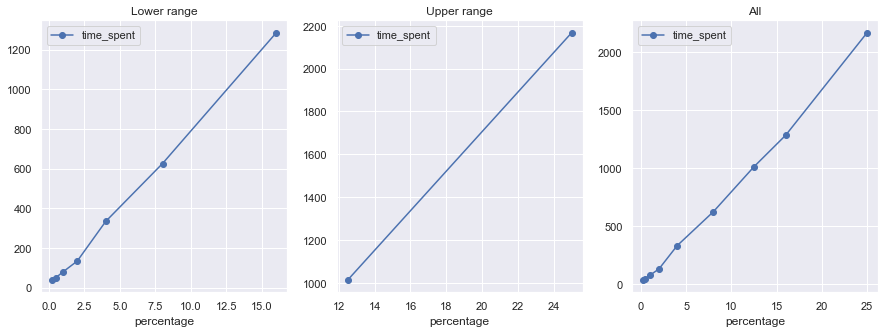

In [40]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

lower_range = ['0-dot-25', '0-dot-5', '1-dot-0', '2-dot-0', '4-dot-0', '8-dot-0', '16-dot-0']
df_scores_scaling[df_scores_scaling.index.isin(lower_range)] \
    .plot.line(x='percentage', y='time_spent', ax=axes[0], style='-o', title='Lower range')
df_scores_scaling[~df_scores_scaling.index.isin(lower_range)] \
    .plot.line(x='percentage', y='time_spent', ax=axes[1], style='-o', title='Upper range')
_ = df_scores_scaling \
    .plot.line(x='percentage', y='time_spent', ax=axes[2], style='-o', title='All')

*Your explanation here*:

We found that the time it takes to calculate the dataframes increases linearly with an increase in data. This is likely due to the low number of partitions used (200). 

The main benefit of spark is that it ustilizes multiple partitions on a computer to perform multiple tasks at once. In order to accomplish this, a number of exchanges and shuffles of the data must be performed. In general, the greater the number of partitions, the more data must be shuffled and exchanged between worker nodes. If there is a large number of partitions and a small amount of data, each worker will not have enough work to do and a large number of exchanges will be performed, thus the performance time will be less than optimal. If there are not enough partitions for the amount of data, each worker node will spend much time working on different tasks. Therefore, there is an optimal number of partitions for each amount of data.

If we were to increase the number of partitions we expect the the results to exhibit this behaviour. Therefore, and improvement would be to find a good starting number of partitions for the smaller dataset and incrase the partitions used in each iteration with the increase in data.

**Hardware specs:**

Processor: 2,3 GHz Dual-Core Intel Core i5

Memory: 8 GB 2133 MHz LPDDR3

Drive: Macintosh HD = ssd

## Part 4: Robustness (5 pts)

In this part we'll explore robustness of our word scores, using the values we computed in part 3. We'll do so by comparing top/bottom words for three different samples of the dataset. Specifically, the scores from your maximum (e.g. 100%) computed sample are to be compared with the 12.5% and 2.0% scores.

Compute and display a dataframe that accounts for any word found in either of the three samples' top/bottom words, and additionally shows the related `word_score` and `word_occurences` values.

Note that `df_scores_scaling.loc['100-dot-0'].df` provides the word scores dataframe of the 100% sample (similarly for the other two). For this part you should rely on pandas functionality only.  Moreover, `pd.set_option('display.max_rows', <n>)` should be set with sufficiently high `n` to show all rows.

In [61]:
pd.set_option('display.max_rows', (21))
pd.set_option('display.max_columns', (3*3))

df_2dot0 = score_data['2-dot-0']['df']
df_12dot5 = score_data['12-dot-5']['df']
df_75dot0 = score_data['25-dot-0']['df']

df_total = pd.concat([df_2dot0[['word','word_score','word_occurences']],\
                      df_12dot5[['word','word_score','word_occurences']],\
                      df_75dot0[['word','word_score','word_occurences']]],\
                     keys=["2.0", "12.5", "25"], axis = 1)

df_total

2.0                                   12.5             \
          word word_score word_occurences        word word_score   
0         good  94.057844         72816.0        good  94.028677   
1         only  94.417178         35045.0        only  94.387817   
2         room  94.531302         58607.0        room  94.563055   
3         nice  94.694564        103665.0        nice  94.709094   
4        there  94.731456         76330.0       there  94.735743   
5         that  94.789915         67944.0        that  94.757334   
6     location  94.806234        168729.0       which  94.810539   
7        which  94.840200         42209.0    location  94.817374   
8    apartment  94.877939        120423.0   apartment  94.861415   
9        close  94.920990         70763.0     located  94.928628   
51         NaN        NaN             NaN         NaN        NaN   
52       again  95.735954         72567.0       again  95.775582   
53        will  95.749384         41374.0        will  95.778763   
54  definitely  95.806070         60295.0  definitely  95.841681   
55        back  95.839206         38310.0        back  95.865503   
56      lovely  95.915127         47695.0      lovely  95.882838   
57     amazing  96.058071         43877.0     amazing  96.073014   
58      highly  96.243432         46703.0      highly  96.227741   
59   wonderful  96.315394         39709.0   wonderful  96.277105   
60   beautiful  96.331551         47320.0   beautiful  96.344873   
61        home  96.398707         47328.0        home  96.394366   

                            25                             
   word_occurences        word word_score word_occurences  
0         452115.0        good  94.008387        910663.0  
1         218482.0        only  94.352211        440041.0  
2         367872.0        room  94.534606        737380.0  
3         648809.0        nice  94.693135       1300179.0  
4         474239.0       there  94.718620        949982.0  
5         421166.0        that  94.737314        844923.0  
6         264194.0    location  94.777301       2103746.0  
7        1046130.0       which  94.783852        529872.0  
8         749635.0   apartment  94.838583       1511455.0  
9         237502.0       close  94.902605        879531.0  
51             NaN       house  95.750025        645735.0  
52        451448.0        will  95.750172        520396.0  
53        259682.0  definitely  95.799978        755561.0  
54        378431.0        back  95.839978        479592.0  
55        239634.0      lovely  95.865621        596850.0  
56        299661.0     amazing  96.054530        540549.0  
57        271046.0      highly  96.209799        577321.0  
58        288256.0   wonderful  96.277933        496889.0  
59        247730.0   beautiful  96.360703        590782.0  
60        293950.0        home  96.391919        593437.0  
61        297611.0         NaN        NaN             NaN

# Exercise 4: Transactions analysis (55 pts)

In this exercise the goal is to analyse historical business transactions (sales of parts to other companies), and derive insights about both products and customers.

The company X produces and globally sells gadget parts to a number of other companies. You requested the sales department of X to provide you with access to the customer and sales transactions database. To your horror, you've found no such database exists, but the data is instead manually maintained in a spreadsheet (error-prone solution). Intrepid as you are, you've accepted to receive the spreadsheet data as a `.csv`, realizing already data cleaning will be necessary.

Your first step (parts 1 and 2) is to clean the data after which you will derive insights about X's business operations (parts 3 and 4).

The input data is available here: [transactions.csv](http://courses.compute.dtu.dk/02807/2021/projects/project2/transactions.csv)

**Using SQL**

In this final exercise you must write SQL to do the data processing in parts 3 and 4. This entails using `psql.sqldf` to execute your queries (up against `df_transactions_cleaned`) which will return a pandas dataframe. Each question should be answered with a *single* query. For visualisation the `psql.sqldf` call should be followed only by functions necessary to customize the plotting/layout steps or reshape the dataframe (i.e. no data processing take place after your SQL statement is materialized as a pandas dataframe).

In part 1 and 2 of this exercise, you should make use of pandas functionality.



## Part 1: Data cleaning (15 pts)

For each column in the dataframe, investigate and **correct** problematic aspects such as,
* Missing values: Insert meaningful values (data imputation). Detectable as `np.nan`'s. A typical value for imputation is the *mode* (most frequent value) of the distribution. If no proper data imputation is possible, you may resort to dropping rows.
* Incorrect values: Typos and other data mishaps are present as values are manually entered. Detectable as low-prevalence categorical values, or ambigious data links (e.g. company listed in multiple countries). If no proper value correction is possible, you may resort to dropping rows.

In both cases, your strategy for replacing values should be data-driven, that is, shaped by the patterns you observe in the data. It is allowed to skip correcting the data (and instead drop the rows) if few rows are improved by your corrections. If in doubt, do the correction.

After all your cleaning steps are completed, you should run the `PandasProfiler` on your cleaned dataset, which should now contain 0% missing cells. Lastly, summarize the issues you identified and how you addressed them.

### Read, profile and explain

As the first step, load the data naming the dataframe `df_transactions`, and make a copy named `df_transactions_cleaned` on which your data cleaning steps will be done. Establish an overview using `PandasProfiler` (but realize there's more to cleaning than what this tool will let you know). Write a paragraph on what the data is about (e.g. what does a row constitute), and a paragraph on what the profile report tells you.

In [78]:
# your code goes here
df_transactions = pd.read_csv('transactions.csv')
df_transactions.profile_report()
df_transactions_cleaned = df_transactions.copy()

*Your explanation here*:

The pandas profiler tells us that we have 20,568 observations with 6 different columns. Out of these observations 1.8% of them flagged as missing cells. We expect 33 missing values in the City column, and we expect this column to contain additional missing values which are "non-words". While there are no missing values flagged for the company column we know that it contains non-words and these are likely values that are need to be cleaned. We know there are a lot of missing values in the country colummn and these should be looked at in more detail. We know there are missing values in part column as well. There is one known missing value in price and we will look at this further. Even with this information, we will have to look at all of the data in more detail as there are likely a number of mistake from manual data entry that will not be caught by the profiler.

### Country column

In [79]:
# your code goes here
print("Before cleaning Unique Values: {0}".format(df_transactions_cleaned['country'].unique()))
print("Old Length: {0}\n".format(len(df_transactions_cleaned)))


# Before making a key, change tyskland to germany because they are the same place!
df_transactions_cleaned.loc[df_transactions_cleaned['country']=='Tyskland','country'] = 'Germany'

# Make a key of cities and countries in order to insert meaningful country names
key = df_transactions_cleaned[['country', 'city']].dropna()
key['combo'] = key['country']+'.'+key['city']
key = key['combo'].unique()

# make dictionary for known city to country combinations
items = {}
for i in range(len(key)):
    entry = key[i].split(".")
    items[entry[1]] = entry[0] 


# make function and use apply to add the country if we know the city, else do nothing
def assign_country(row):
    city = row['city']
    
    if city in items.keys():
        row['country'] = items.get(city)
        
    return row
df_transactions_cleaned = df_transactions_cleaned.apply(assign_country, axis=1)



# remaining values are both NaN in the country and city columns and we do not have a meaningful value to add here.
# It doesnt make sense to use the mode of the country or city to replace these values as it introduces potentially 
# blatant errors into the data. So drop the countries with a NaN.
df_transactions_cleaned = df_transactions_cleaned[df_transactions_cleaned['country'].notna()]

# potuga is a typo to be changed to portugal
df_transactions_cleaned.loc[df_transactions_cleaned['country']=='Portuga','country'] = 'Portugal'

# changing US to United states
df_transactions_cleaned.loc[df_transactions_cleaned['country']=='US','country'] = 'United States'

print("After cleaning unique values: {0}".format(df_transactions_cleaned['country'].unique()))
print("New Length: {0}".format(len(df_transactions_cleaned)))
# we have cleaned the country column properly because we have replaced or removed the nan values that were identified in the profiler.
# We have checked that the only values in the country column are what is expected

Before cleaning Unique Values: ['Spain' 'Greece' 'France' 'Germany' 'United Kingdom' 'Portugal'
 'United States' 'Netherlands' 'Japan' 'Switzerland' nan 'US' 'Tyskland'
 'Portuga']
Old Length: 20568

After cleaning unique values: ['Spain' 'Greece' 'France' 'Germany' 'United Kingdom' 'Portugal'
 'United States' 'Netherlands' 'Japan' 'Switzerland']
New Length: 20538


### Company column

In [80]:
# your code goes here
# look at values
print("Before cleaning Unique Values: {0}".format(df_transactions_cleaned['company'].unique()))
print("Old Length: {0}\n".format(len(df_transactions_cleaned)))


# Clean Laj0 to Lajo
df_transactions_cleaned.loc[df_transactions_cleaned['company']=='Laj0','company'] = 'Lajo'

# Clean Zooxo. to Zooxo
df_transactions_cleaned.loc[df_transactions_cleaned['company']=='Zooxo.','company'] = 'Zooxo'

# Clean Ntagz to Ntags
df_transactions_cleaned.loc[df_transactions_cleaned['company']=='Ntagz','company'] = 'Ntags'

# Clean Thoughtmixs to Thoughtmix
df_transactions_cleaned.loc[df_transactions_cleaned['company']=='Thoughtmixz','company'] = 'Thoughtmix'

# Remove the nonsensical values
df_transactions_cleaned = df_transactions_cleaned[(df_transactions_cleaned.loc[:, 'company'].str.contains(' -')==False)]
df_transactions_cleaned = df_transactions_cleaned[(df_transactions_cleaned.loc[:, 'company'].str.contains(' a')==False)]
df_transactions_cleaned = df_transactions_cleaned[(df_transactions_cleaned.loc[:, 'company'].str.contains('aa')==False)]

print("After cleaning unique values: {0}".format(df_transactions_cleaned['country'].unique()))
print("New Length: {0}\n".format(len(df_transactions_cleaned)))

Before cleaning Unique Values: ['Chatterbridge' 'Lajo' 'Flipstorm' 'Twitterbeat' 'Voomm' 'Buzzbean'
 'Zooxo' 'Brainsphere' 'Thoughtmix' 'Wordify' 'Teklist' 'Avaveo' 'Ntags'
 'Innojam' 'Shufflebeat' 'Zoonder' 'Kanoodle' 'Gabcube' 'Roodel'
 'Riffpath' 'Eimbee' 'Yozio' 'Rhycero' 'Realpoint' 'Gabtune' 'Bubblemix'
 'Gevee' 'Tagtune' 'Zooxo.' 'Laj0' 'Ntagz' ' -' ' a' 'aa' 'Thoughtmixz']
Old Length: 20538

After cleaning unique values: ['Spain' 'Greece' 'France' 'Germany' 'United Kingdom' 'Portugal'
 'United States' 'Netherlands' 'Japan' 'Switzerland']
New Length: 20535



### City column

In [81]:
# your code goes here

# look at values
print("Before cleaning Unique Values: {0}".format(df_transactions_cleaned['city'].unique()))
print("Old Length: {0}\n".format(len(df_transactions_cleaned)))

df_transactions_cleaned[df_transactions_cleaned['city'].isna()].head()

# drop nan values (there are only three values in portugal so it wont affect the data analysis to drop these values)
df_transactions_cleaned = df_transactions_cleaned[df_transactions_cleaned['city'].notna()]

#clean Amadora\t to Amadora
df_transactions_cleaned.loc[df_transactions_cleaned['city']=='Amadora\t','city'] = 'Amadora'

print("After cleaning Unique Values: {0}".format(df_transactions_cleaned['city'].unique()))
print("New Length: {0}\n".format(len(df_transactions_cleaned)))

Before cleaning Unique Values: ['Barcelona' 'Thessaloniki' 'Athens' 'Annecy' 'Paris' 'Düsseldorf'
 'London' 'Braga' 'Nanterre' 'Amadora\t' 'New York' 'Arnhem' 'Nice'
 'Lisbon' 'Amsterdam' 'Porto' 'Boston' 'Niihama' 'Almada' 'Aranhas'
 'Heraklion' 'Amiens' 'Patras' 'Arcueil' 'Lyon' 'Asaka' 'Champagnole'
 'Zürich' nan 'Monção' 'Vila Fria']
Old Length: 20535

After cleaning Unique Values: ['Barcelona' 'Thessaloniki' 'Athens' 'Annecy' 'Paris' 'Düsseldorf'
 'London' 'Braga' 'Nanterre' 'Amadora' 'New York' 'Arnhem' 'Nice' 'Lisbon'
 'Amsterdam' 'Porto' 'Boston' 'Niihama' 'Almada' 'Aranhas' 'Heraklion'
 'Amiens' 'Patras' 'Arcueil' 'Lyon' 'Asaka' 'Champagnole' 'Zürich'
 'Monção' 'Vila Fria']
New Length: 20532



### Parts column

In [82]:
# your code goes here

# look at values
print("Before cleaning Unique Values: {0}".format(df_transactions_cleaned['part'].unique()))
print("Old Length: {0}\n".format(len(df_transactions_cleaned)))

#find most common part
most_common_part = df_transactions_cleaned['part'].value_counts().index[0]

# replace nan values with the most common part number
df_transactions_cleaned.loc[df_transactions_cleaned['part'].isna(), 'part'] = most_common_part

# look at values
print("After cleaning Unique Values: {0}".format(df_transactions_cleaned['part'].unique()))
print("New Length: {0}\n".format(len(df_transactions_cleaned)))

Before cleaning Unique Values: ['54868-5165' '60505-2867' '24385-268' '76117-001' '44946-1046'
 '16729-167' '52125-444' '43419-018' '54092-515' '24286-1562' '49035-530'
 '36987-1697' '51346-145' '51138-049' '0268-6107' '51523-002' '62670-4404'
 '49288-0285' '68233-011' '49349-471' '67544-356' '55700-014' '98132-889'
 '17156-617' '49348-574' '76454-100' '70253-307' '62756-707' '0268-1604'
 '41163-428' '62011-0219' '54868-0823' '68462-565' '61398-0828'
 '52343-025' '54473-578' '51079-947' '37205-992' '16714-295' '49349-842'
 '54123-957' '58118-5060' '16590-177' '49288-0655' '67046-030' '16477-306'
 '0615-7679' '52380-1102' '51346-126' '21695-267' '51531-9500' '50563-113'
 '68084-172' '68180-121' '13537-468' '37205-951' '10267-2529' '62742-4030'
 '76335-006' '65044-3014' '35356-325' '49349-820' '68084-595' '0228-2167'
 '10237-832' '58668-4281' '10578-049' '49967-724' '36800-952' '13537-259'
 '0603-6134' '49349-106' '0699-7041' '63629-2733' '55289-164' '68752-024'
 '55154-5057' '49999-737'

### Price column

In [83]:
# #look at values
print("Before cleaning Unique Values: {0}".format(df_transactions_cleaned['price'].unique()))
print("Old Length: {0}\n".format(len(df_transactions_cleaned)))

#choose the most common price for the one missing value and replace it
most_common_price = df_transactions_cleaned['price'].value_counts().index[1]
df_transactions_cleaned.loc[df_transactions_cleaned['price'].isna(), 'price'] = most_common_price


#replace '-' with most common value
df_transactions_cleaned.loc[df_transactions_cleaned['price'] == '-' , 'price'] = most_common_price
df_transactions_cleaned.loc[df_transactions_cleaned['price'] == 'void' , 'price'] = most_common_price
df_transactions_cleaned.loc[df_transactions_cleaned['price'] == 'na' , 'price'] = most_common_price

#transfering price symbol to the end of the price string
def clean_price(row):
    price = row['price']
    if price.startswith(('$', '€', '¥', '£')):
        sym = price[0]
        price = price[1:] + sym
        row['price'] = price
    return row

df_transactions_cleaned = df_transactions_cleaned.apply(clean_price, axis=1)

# #look at values
print("After cleaning Unique Values: {0}".format(df_transactions_cleaned['price'].unique()))
print("New Length: {0}\n".format(len(df_transactions_cleaned)))

Before cleaning Unique Values: ['784.79€' '187.99€' '221.73€' ... '686.1€' '1051.08€' '139.56€']
Old Length: 20532

After cleaning Unique Values: ['784.79€' '187.99€' '221.73€' ... '686.1€' '1051.08€' '139.56€']
New Length: 20532



### Date column

In [84]:
# #look at values
print("Before cleaning Unique Values: {0}".format(df_transactions_cleaned['date'].unique()))
print("Old Length: {0}\n".format(len(df_transactions_cleaned)))

#changing 10/04/2017 date format to 2017-04-10
def clean_date(row):
    date = row['date']
    if '/' in date:
        splited_date = date.split('/')
        splited_date.reverse()
        date = '-'.join(splited_date)
        row['date'] = date
    return row

df_transactions_cleaned = df_transactions_cleaned.apply(clean_date, axis=1)

# #look at values
print("After cleaning Unique Values: {0}".format(df_transactions_cleaned['date'].unique()))
print("New Length: {0}\n".format(len(df_transactions_cleaned)))

Before cleaning Unique Values: ['2016-01-02 00:01:05' '2016-01-02 00:05:26' '2016-01-02 00:18:30' ...
 '2018-12-31 21:38:02' '2019-02-21 20:05:00' '2019-05-14 22:48:39']
Old Length: 20532

After cleaning Unique Values: ['2016-01-02 00:01:05' '2016-01-02 00:05:26' '2016-01-02 00:18:30' ...
 '2018-12-31 21:38:02' '2019-02-21 20:05:00' '2019-05-14 22:48:39']
New Length: 20532



### Profile `df_transactions_cleaned` and summarize corrections made

In [85]:
#reseting indices
df_transactions_cleaned = df_transactions_cleaned.reset_index(drop = True)
df_transactions_cleaned.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*Your summary goes here*

We have sucessfully cleaned the data. Our overall technique was to replace missing values with something meaningful to preserve as much data as possible. For example when we had missing country values, we looked to see if there was a city value in that row. If so, we used a dictionary created from know country-city relationships in the complete data so add the ccorrect country value. If we could meaningfully replace a value with the mode of the column we did. The only rows dropped were rows in which there was not city or country data. It did not make sense to replace this with the mode of columns, and there were only a few values like this. Noticeable typos were replaced with the value that was most common in the column and resembled the error. Items such as the date and price columns were cleaned so that they had the same format as every other entry. All of the currency symbols were moved to the end to ensure easier data processing later on. 


## Part 2: Standardise prices (5 pts)

Transaction prices are recorded in the local currency of the client (EUR, GBP, USD or JPY). You will need to convert these prices from local currency into the common currency (chosen here as) EUR, for comparability. These standardised prices should be added as a column to the dataframe called `prices_euro`.

Consider a two step process where you 1) Identify what currency has been used, and 2) Calculate the price conversion. Step 1 may reveal the data is still not completely clean (so either correct by impute or drop). For Step 2 look up exchange rates on the Internet.

In [86]:
# Identify the currency being used and split the price and currency
df_transactions_cleaned['currency'] = df_transactions_cleaned["price"].str[-1]
df_transactions_cleaned['price'] = df_transactions_cleaned["price"].str[:-1].astype(float)
df_transactions_cleaned['prices_euro'] = df_transactions_cleaned['price'] 

def gbp2euro(price):
    return price * 1.19

def usd2euro(price):
    return price * 0.89

def jpy2euro(price):
    return price * 0.0077

def convertCurrency(row):
    price = row['price']
    currency = row['currency']
    
    if(currency == '$'):
        price = usd2euro(price)
        
    elif(currency == '£'):
        price = gbp2euro(price)
        
    elif(currency == '¥'):
        price = jpy2euro(price)
        
    row['prices_euro'] = price
    
    return row

df_transactions_cleaned = df_transactions_cleaned.apply(convertCurrency, axis=1)
 

## Part 3: Business insights (15 pts)

### Company by revenue

The revenue of a company is its total value of orders, all time. Compute and visualise all companies by revenue in descending order.

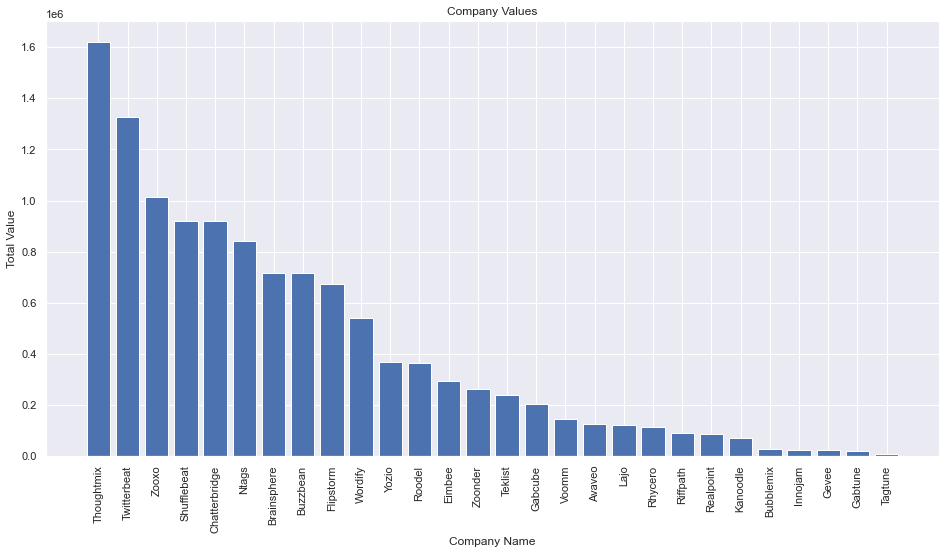

In [87]:
company_value_df = psql.sqldf("""
SELECT  company,
        SUM(prices_euro) as value
    FROM df_transactions_cleaned
GROUP BY company
ORDER BY value DESC
""")

#visualization
plt.figure(figsize = (16, 8))
plt.bar(company_value_df.company, company_value_df.value)
plt.xlabel('Company Name')
plt.xticks(rotation = 90)
plt.ylabel('Total Value')
plt.title('Company Values')
plt.show()

### Country by revenue, per year

The revenue of a country in a time period, is its total value of orders in that time period. Compute and visualise all countries by revenue, for years 2016, 2017 and 2018. Your visualisation should have countries on the x-axis and multiple bars (one for each year).

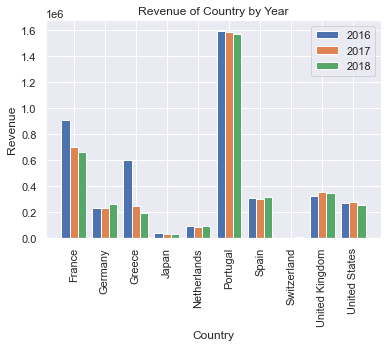

In [88]:
country_rev_per_year = psql.sqldf("""
SELECT country,
       SUM(prices_euro) as value,
       STRFTIME('%Y', date) as year
    FROM df_transactions_cleaned
    WHERE (year = '2016' OR year = '2017' OR year = '2018')
GROUP BY country, year
""")

#visualization
# Visualize the data
plt.figure()

xlabs = list(country_rev_per_year['country'].unique())

x = np.arange(0,3*len(xlabs), 3)

plt.bar(x-0.8, country_rev_per_year.value[country_rev_per_year['year'] == '2016'])
plt.bar(x, country_rev_per_year.value[country_rev_per_year['year'] == '2017'])
plt.bar(x+0.8, country_rev_per_year.value[country_rev_per_year['year'] == '2018'])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Revenue of Country by Year')
plt.xticks(x, xlabs, rotation = '90')

plt.legend(['2016','2017','2018'])
plt.show()

### Orders per quarter, all companies

Compute and visualise the number of orders each company has placed in each quarter. Exclude quarters where the order count is less than 3. As always, be mindful to not produce a cluttered visualisation.

Part of your query should form a variable that converts `date` into `YEAR_QUARTER` format. Dealing with dates is via `STRFTIME` [docs](https://www.sqlite.org/lang_datefunc.html) which doesn't allow quarter extraction. Instead, it allows for extraction of month, which you can case on in order to produce the quarter (Q1, Q2, Q3, Q4).  

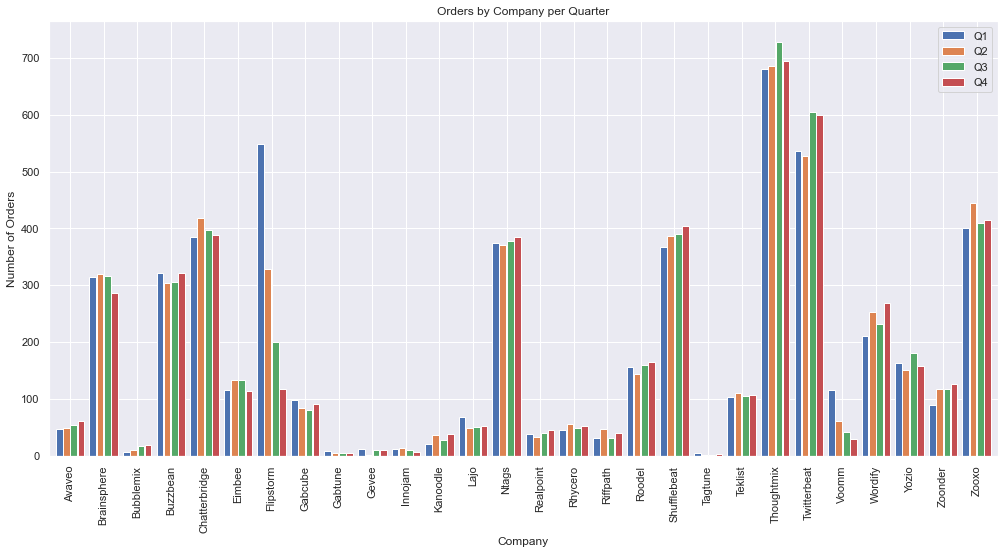

In [89]:
# your code goes here
quarter_df = psql.sqldf("""
SELECT company,
       COUNT(company) as orders,
       STRFTIME('%m', date) as month,
       CASE
           WHEN STRFTIME('%m', date) == '01' or STRFTIME('%m', date) == '02' or STRFTIME('%m', date) == '03' THEN 'Q1'
           WHEN STRFTIME('%m', date) == '04' or STRFTIME('%m', date) == '05' or STRFTIME('%m', date) == '06' THEN 'Q2'
           WHEN STRFTIME('%m', date) == '07' or STRFTIME('%m', date) == '08' or STRFTIME('%m', date) == '09' THEN 'Q3'
           ELSE 'Q4'
        END quarter
    FROM df_transactions_cleaned
GROUP BY company, quarter
""")

plt.figure(figsize = (17,8))

xlabs = list(quarter_df['company'].unique())

x = np.arange(0,4*len(xlabs), 4)
bar_width = 0.8
plt.bar(x-1.3, quarter_df.orders[quarter_df['quarter'] == 'Q1'], width = bar_width)
plt.bar(x-0.45, quarter_df.orders[quarter_df['quarter'] == 'Q2'], width = bar_width)
plt.bar(x+0.45, quarter_df.orders[quarter_df['quarter'] == 'Q3'], width = bar_width)
plt.bar(x+1.3, quarter_df.orders[quarter_df['quarter'] == 'Q4'], width = bar_width)

plt.xlabel('Company')
plt.ylabel('Number of Orders')
plt.title('Orders by Company per Quarter')
plt.xticks(x, xlabs, rotation = '90')
plt.xlim([-2.5, max(x)+2.5])
plt.legend(['Q1','Q2','Q3', 'Q4'])
plt.show()

## Part 4: Parts and prices (20 pts)

### Parts demand changes

A different amount of orders are placed on parts each year. The demand of a part is the number of orders placed on it. The demand change of a part is the absolute difference between its average demand in 2016/2017, and its demand in 2018.

Compute and visualise the 15 parts whose demand change has been the largest.

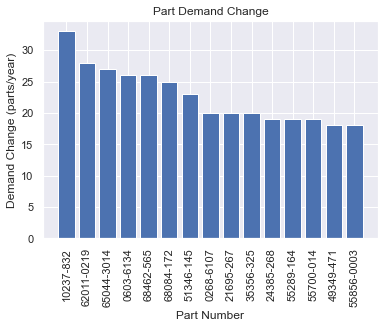

In [90]:
demand_change = psql.sqldf("""
WITH past_orders AS (
    SELECT part,
    COUNT(part)/2 AS orders
    FROM df_transactions_cleaned
    WHERE STRFTIME('%Y', date) == '2016' or STRFTIME('%Y', date) == '2017'
    GROUP BY part
), current_orders AS (
    SELECT part,
    COUNT(part) AS orders
    FROM df_transactions_cleaned
    WHERE STRFTIME('%Y', date) == '2018'
    GROUP BY part
)
    SELECT past_orders.part,
        past_orders.orders AS past_orders_count,
       current_orders.orders AS current_orders_count,
       ABS(current_orders.orders - past_orders.orders) AS demand_change
    FROM past_orders
    INNER JOIN current_orders USING (part)
    ORDER BY demand_change DESC
    LIMIT 15
""")


plt.figure()
plt.bar(demand_change['part'], demand_change['demand_change'])
plt.title('Part Demand Change')
plt.xlabel('Part Number')
plt.ylabel('Demand Change (parts/year)')
plt.xticks(rotation = '90')
plt.show()

### Popular parts pricing

The most popular parts are those whose demand has increased the most from its 2016/2017 average to 2018. We're interested to find out if popularity is due to a price drop, and also inform us if prices of these parts are properly adjusted.

The demand increase of a part is its 2018 demand minus its 2016/2017 average demand. The price change of a part is its average 2018 price minus its average 2016/2017 price.

Compute the parts whose demand has increased (has positive demand increase) and the change in price for each of these parts. Then visualise this relationship and include in the figure title the correlation (compute via pandas) between these two variables. Conclude which is most likely 1) Parts became more popular from a drop in prices, or 2) The sales department deserved its bonuses.

<ipython-input-91-f92b4b1bbd3d>:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


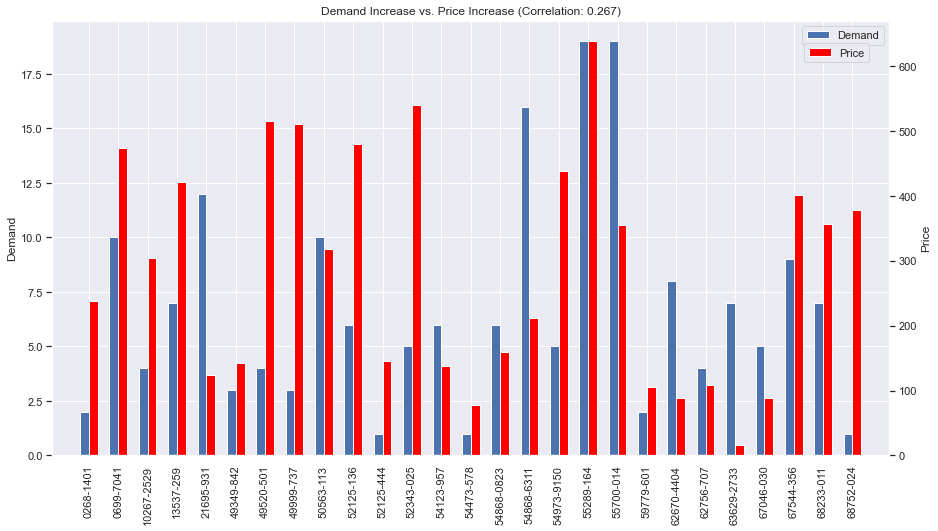

In [91]:
# your code goes here
demand_price = psql.sqldf("""
WITH past_orders AS (
    SELECT part,
           prices_euro/2 as price,
           COUNT(part)/2 AS orders
    FROM df_transactions_cleaned
    WHERE STRFTIME('%Y', date) == '2016' or STRFTIME('%Y', date) == '2017'
    GROUP BY part
), current_orders AS (
    SELECT part,
           prices_euro as price,
           COUNT(part) AS orders
    FROM df_transactions_cleaned
    WHERE STRFTIME('%Y', date) == '2018'
    GROUP BY part
)
    SELECT past_orders.part,
           past_orders.orders AS past_orders_count,
           past_orders.price AS past_order_price,
           current_orders.orders AS current_orders_count,
           current_orders.price AS current_orders_price,
           (current_orders.orders - past_orders.orders) AS demand_increase,
           (current_orders.price - past_orders.price) AS price_increase
    FROM past_orders
    INNER JOIN current_orders USING (part)
    WHERE demand_increase > 0
""")




# Compute correlation
correlation = demand_price[['demand_increase', 'price_increase']].corr()

fig = plt.figure(figsize=(15,8))
bar_width = 0.6
xlabs = list(demand_price['part'].unique())
x = np.arange(0,2*len(xlabs), 2)

plt.xticks(x, xlabs, rotation = '90')
plt.xlim([-2.5, max(x)+2.5])


plt.title('Demand Increase vs. Price Increase (Correlation: {0:.3})'.format(correlation['demand_increase']['price_increase']))
plt.xticks(rotation = "90")

ax = fig.add_subplot(111)
plt.bar(x-0.3, demand_price['demand_increase'], width = bar_width, label = 'Demand')

ax2 = ax.twinx()
plt.bar(x+0.3, demand_price['price_increase'], color = "Red", width = bar_width, label = 'Price')


ax.set_ylabel('Demand')
ax2.set_ylabel('Price')

plt.grid(False)
ax.legend()
ax2.legend(bbox_to_anchor = (0.9825,0.96))
plt.show()

*your explanation goes here*

There is slight correlation between the increase in demand and the increase in prices. The chart shows that for all of these products, both the price and demand increaased. This indeicated that there was ot drop in prices driving the increase in demand, and I would give the sales team their bonuses!